linear regression in pytorch

In [1]:
import torch
from torch import nn #all pytorch building blocks for neural networks
import matplotlib.pyplot as plt

In [2]:
import torch

print(f"Pytorch version : {torch.__version__}")
print(f"CUDA available : {torch.cuda.is_available()}")
print(f"CUDA version : {torch.version.cuda}")

if torch.cuda.is_available():
    print(f"GPU device : {torch.cuda.get_device_name(0)}")
else:
    print("GPU device : None (using CPU only)")


Pytorch version : 2.8.0+cpu
CUDA available : False
CUDA version : None
GPU device : None (using CPU only)


In [3]:
weight = 0.7
bias = 0.3
start =0
end=1
step=0.02
X= torch.arange(start,end,step).unsqueeze(dim=1) #.unsqueeze(dim=1) → adds an extra dimension to make it a column vector instead of a row.
y=weight*X+bias
print(f"X(first 10):{X[10:].flatten()}")
print(f"y(first 10):{y[10:].flatten()}")

X(first 10):tensor([0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400, 0.3600,
        0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200, 0.5400,
        0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000, 0.7200,
        0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000,
        0.9200, 0.9400, 0.9600, 0.9800])
y(first 10):tensor([0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380, 0.5520,
        0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640, 0.6780,
        0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900, 0.8040,
        0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300,
        0.9440, 0.9580, 0.9720, 0.9860])


In [4]:
train_split = int(0.8*len(X))

In [5]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train), len(y_train))
print(len(X_test),len(y_test))
assert len(X_train) + len(X_test) == len(X), "data partitioning error detected"

40 40
10 10


In [6]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
BATCH_SIZE = 8
NUM_WORKERS=0
train_dataloader = DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader = DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
print(len(train_dataloader), len(test_dataloader), BATCH_SIZE, len(train_dataset), len(test_dataset))
for batch_X, batch_y in train_dataloader:
    print(f"batch X shape: {batch_X.shape}")
    print(f"batch y shape: {batch_y.shape}")
    print(f"batch X: {batch_X.flatten()}")
    print(f"batch y: {batch_y.flatten()}")
    break

5 2 8 40 10
batch X shape: torch.Size([8, 1])
batch y shape: torch.Size([8, 1])
batch X: tensor([0.7000, 0.3600, 0.5600, 0.7200, 0.4400, 0.0600, 0.0200, 0.1000])
batch y: tensor([0.7900, 0.5520, 0.6920, 0.8040, 0.6080, 0.3420, 0.3140, 0.3700])


In [7]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data = X_test, test_labels = y_test, predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="green", s=25, alpha=0.5, label="training data", marker='o')
    plt.scatter(test_data, test_labels, c="blue", s=15, alpha=0.7, label="testing data", marker='s')
    if predictions is not None:
        plt.scatter(test_data, predictions, c="red", s=25, alpha=0.8, marker='^')
    plt.xlabel("input features", fontsize=12)
    plt.ylabel("target values", fontsize=12)
    plt.title("linear regression", fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

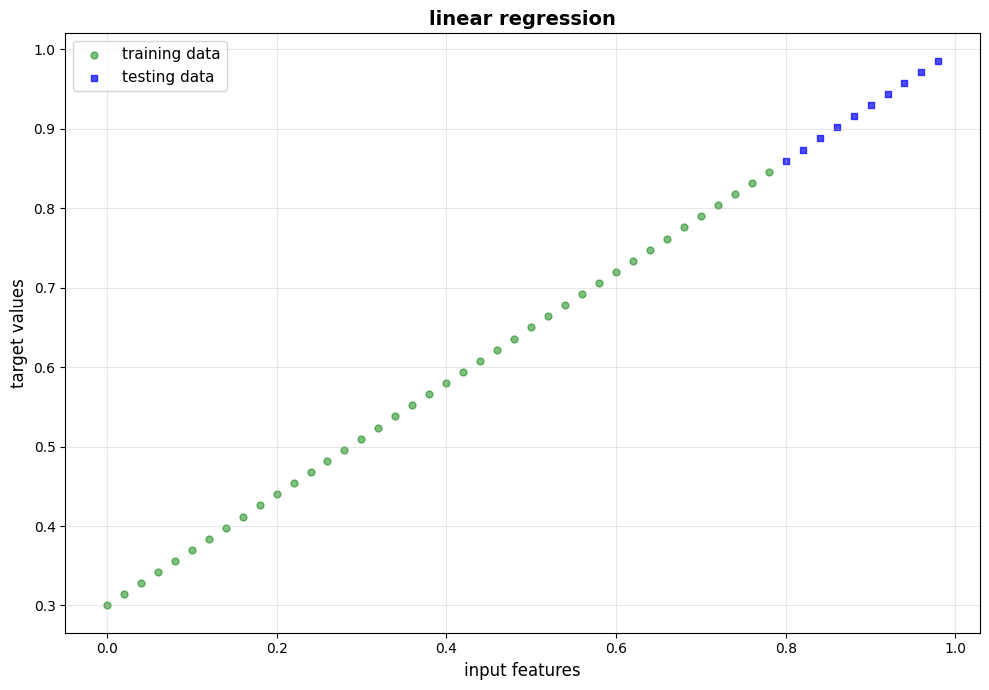

In [8]:
plot_predictions();

In [9]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias

In [10]:
model=LinearRegressionModel()
x = torch.tensor([[2.0],[3.],[4.]])
x, x.shape
y_pred=model(x)
print(y_pred)

tensor([[2.7138],
        [3.9325],
        [5.1512]], grad_fn=<AddBackward0>)


MODEL SERIALIZATION

In [11]:
from pathlib import Path
MODEL_PATH = Path("models") #path obj pointing to ./models
MODEL_PATH.mkdir(parents=True, exist_ok=True)
print(f"model directory created:{MODEL_PATH.absolute()}")
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)

#savinf the model weights
# torch.save(obj = model_0.state_dict(), f=MODEL_SAVE_PATH)

if MODEL_SAVE_PATH.exists():
    file_size=MODEL_SAVE_PATH.stat().st_size
    print(file_size)
    # print(len(model_0.state_dict()))
else:
    print("model save failed")

saved_state = torch.load(MODEL_SAVE_PATH, weights_only=True)

for param_name, param_value in saved_state.items():
    print(param_name, param_value)
for name, t in saved_state.items():
    if t.numel()==1:
        print(name, t.item())
    else:
        print(f"{name}, shape={tuple(t.shape)}, dtype={t.dtype}")

model directory created:c:\Users\KIIT0001\OneDrive\Desktop\mlpractice\models
models\01_pytorch_workflow_model_0.pth
model save failed


FileNotFoundError: [Errno 2] No such file or directory: 'models\\01_pytorch_workflow_model_0.pth'

In [ ]:
import torch
x = torch.tensor([2.0], requires_grad=True)
y=x**3

print(x.grad)

None


In [16]:
import torch
a = torch.tensor([[1],[2],[3]])
b = torch.tensor([[4],[5],[6]])
x = torch.stack([a.squeeze(), b.squeeze(1)], dim=1)

In [ ]:
import torch
x = torch.tensor([3.0], requires_grad=True)
y=x*2
z=y**2
a=z*3
a.backward()
# print(y.grad) y is not a leaf tensor, x is
print(x.grad)

tensor([72.])


In [18]:
import torch
x = torch.arange(12).reshape(3,4)
y=x[1:, :3]
print(y[0,2])

tensor(6)


In [ ]:
import torch
A = torch.randn(3,4)
B = torch.randn(4)
C = A*B
print(C) #Tensor B is automatically broadcasted to shape (3, 4), and each row of A is element-wise multiplied with B.

tensor([[-0.2746, -0.0580,  0.1431, -0.0695],
        [ 0.9875, -0.2592, -0.0940, -0.5965],
        [-0.9809, -0.6780,  0.2383,  0.0203]])


In [ ]:
import torch
x = torch.tensor([[2.,4.,6.],[1.,3.,5.]])
m1=x.mean().item()
m2=x.mean(dim=0)
m3=x.mean(dim=1)
v1=m2.mean().item()
v2=m3.mean().item()

In [ ]:
import torch
a = torch.ones((2,2), device='cuda') #tensor on gpu
b = torch.ones((2,2)) #tensor on cpu
c = a+b
print(c.device)

cpu


practice1

In [ ]:
import pandas as pd
a = [1,7,2]
var = pd.Series(a)
print(var)
print(type(var))
print(var[2])

0    1
1    7
2    2
dtype: int64
<class 'pandas.core.series.Series'>
2


In [ ]:
var1 = pd.Series(a, index = ["x", "y", "z"])
print(var1)
print(var1["y"])

x    1
y    7
z    2
dtype: int64
7


In [ ]:
y = {"x": 1, "y": 7, "z": 2}
var2 = pd.Series(y)
print(var2)

x    1
y    7
z    2
dtype: int64


In [ ]:
var3 = {
    "cal": [100,200,300],
    "dura": [2,4,6]
}
df = pd.DataFrame(var3)
print(df)

   cal  dura
0  100     2
1  200     4
2  300     6


In [ ]:
print(df.loc[2])
print(type(df.loc[2]))

cal     300
dura      6
Name: 2, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
print(df.loc[[0,1]])
print(type(df.loc[[0,1]]))

   cal  dura
0  100     2
1  200     4
<class 'pandas.core.frame.DataFrame'>


In [ ]:
import torch

In [ ]:
torch.__version__

'2.8.0+cpu'

In [ ]:
a = torch.tensor(7)
print(a)
print(a.item())
print(a.dtype)
print(a.shape)
print(a.size())

tensor(7)
7
torch.int64
torch.Size([])
torch.Size([])


In [ ]:
dime = a.ndim
print(dime)

0


In [ ]:
a = torch.tensor([1.0, 2.0, 3.0])
print(torch.sum(a))
print(type(torch.norm(a)))

tensor(6.)
<class 'torch.Tensor'>


In [ ]:
a = torch.tensor([[1,2,3], [4,5,6]])
print(a.dtype)
print(a.shape)
print(a.size())
print(a.ndim)

torch.int64
torch.Size([2, 3])
torch.Size([2, 3])
2


In [ ]:
zero = torch.zeros(3,4)
print(zero)
print(zero.shape)
print(zero.dtype)
print(zero.device)
print(zero.numel()) #returns total number of elements present in current tensor object
print(zero.element_size()*zero.numel()) #in bytes
print(torch.sum(zero).item())

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.Size([3, 4])
torch.float32
cpu
12
48
0.0


In [ ]:
one = torch.ones(3,4)
print(one)
print(one.shape)
print(one.dtype)
print(one.device)
print(one.numel()) #returns total number of elements present in current tensor object
print(one.element_size()*one.numel()) #in bytes
print(torch.sum(one).item())

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.Size([3, 4])
torch.float32
cpu
12
48
12.0


In [15]:
var = torch.tensor([1,2,3])
x =var*10
print(var*x)

tensor([10, 40, 90])


In [ ]:
import torch
cude_avail = torch.cuda.is_available() 
if cude_avail:
    print(torch.cuda.get_device_name(0))
    print(torch.cuda.device_count())
    print(torch.cuda.device_count())
    print(torch.cuda.current_device())
    print(torch.cuda.get_device_properties(0).total_memory)


In [21]:
import torch
import torch.nn as nn
X = torch.randn(32,10)
layer = nn.Linear(10,5)
out = layer(X)
print(out.shape)

torch.Size([32, 5])


In [ ]:
import torch
import torchvision.transforms as transforms
tr = transforms.Compose([
    transforms.Normalize(mean=[0.0], std=[1.0])
]) #transforms.Compose([...]) allows you to chain multiple transformations together.
x = torch.tensor([[[1,2], [3,4]]], dtype=torch.float)
print(tr(x))

tensor([[[1., 2.],
         [3., 4.]]])


In [23]:
import torch
pred = torch.tensor([1,2,3])
true = torch.tensor([1,3,4])
print((pred==true).mean().item())

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Bool

In [ ]:
import torch
torch.manual_seed(0)
X = torch.tensor([[2., -3.]])
layer = nn.Linear(2,1)
with torch.no_grad(): #temporariuly disables gradient tracking, manually modify parameters
    layer.weight[:] = torch.tensor([[1., -2.]])
    layer.bias[:] = torch.tensor([0.5])
output = layer(X)
print(output.item())

8.5


In [ ]:
import torch
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(10,10),
    nn.BatchNorm1d(10),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(10,1)
)
# model.eval()
X = torch.randn(4,10)
print(model(X))

tensor([[ 0.9401],
        [-0.0906],
        [-0.2390],
        [-0.3787]], grad_fn=<AddmmBackward0>)


In [28]:
import torch
x = torch.randn(1,6,12,4)
flattened = x.view(x.size(2), -1)
print(flattened.shape)

torch.Size([12, 24])


In [31]:
import torch
import torch.nn as nn
x = torch.randn(1,1,28,28)
conv1 = nn.Conv2d(1,2,2,1,0)
relu = nn.ReLU()
pool = nn.AdaptiveAvgPool2d(1)
s = pool(relu(conv1(x)))
print(s.shape)

torch.Size([1, 2, 1, 1])
